# `invivo` example notebook
## Automatic analysis of study log data

by Hersh Bhargava (https://hershbhargava.com)

github: https://github.com/hbhargava/invivo

This notebook demonstrates the use of the `invivo` package to automatically analyze study log data.

## Setup

Setup is easiest with Anaconda. Make sure you have Anaconda installed (https://www.anaconda.com/download).

1) Download or clone the package from Github (https://github.com/hbhargava/invivo)
2) Open a terminal and navigate to the package directory
3) Run the script `config_conda_env.sh` to create the conda environment (installs Python and other dependencies)

    ```bash
    # may need to make the script executable
    chmod +x config_conda_env.sh

    # run the script
    ./config_conda_env.sh
    ```
4) Activate the environment

    ```bash
    conda activate invivo
    ```

5) Start your preferred Jupyter notebook server (I use VSCode/Cursor; make sure to select the `invivo` environment)


In [1]:
from invivo.invivo_analyzer import InVivoAnalyzer
import matplotlib.pyplot as plt
# plt.style.use('~/hkb-lab.mplstyle')  # Replace with the correct path


# Specify the input data and group names

In [2]:
path = "example_studylog_e627.xlsx"
group_names = ["CAR+ Homo", "CAR+ Hetero", "CAR+ WT", "UT WT"] # ordered list of group names



# Auto Ingest Data

### <span style="color: red;">Important: Make sure to read the output after running the next cell to make sure things make sense.</span>


In [3]:
analyzer = InVivoAnalyzer(data_path=path)
analyzer.set_group_names(group_names=group_names)


Initializing InVivoAnalyzer with data from: example_studylog_e627.xlsx
--------------------------------------------------------------------------------
Finding relevant sheets in the data file...
--------------------------------------------------------------------------------
found bodyweight data in sheet `Data BW`
found mortality data in sheet `Data MO`
found tumor volume data in sheet `Data TV-R`
--------------------------------------------------------------------------------
Automatically parsing data from the sheets mentioned above.
--------------------------------------------------------------------------------
The earliest date in the data is 2025-03-24 00:00:00. Treating this as the start of the experiment.
To override, call `self.set_study_start_date()` with a datetime object.
--------------------------------------------------------------------------------
Found the following groups with the following sizes:
   Group ID  Number of Animals
0         1                  7
1      

/Users/hbhargava/Drive/Projects/Code/invivo/invivo/io.py:95: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tumor_volume_df['Recorded Time'] = pd.to_datetime(tumor_volume_df['Recorded Time'])
/Users/hbhargava/Drive/Projects/Code/invivo/invivo/invivo_analyzer.py:114: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'CAR+ Homo' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.master_data.loc[self.master_data['Group ID'] == original_id, 'Group ID'] = new_name


# Plot Survival Curves

Survival curves are calculated from the Mortality Observations (`Data MO`) sheet.

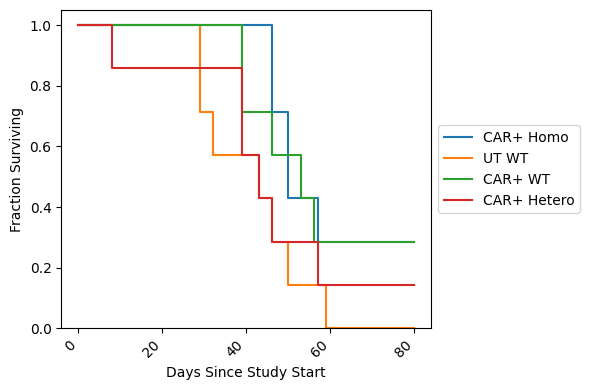

In [4]:
fig, ax = analyzer.plot_survival_curves(fractional=True, figsize=(6,4))

# save the figure as svg
fig.savefig('survival_curves.svg', format='svg', bbox_inches='tight')

# Other plots: Tumor volume, Bodyweight, etc.

`invivo` supports ingestion and plotting of other data types, such as tumor volume, bodyweight, etc.

You can see the datatypes that have been ingested by running:

```python
analyzer.master_data['Data Type'].unique()
```

In [5]:
analyzer.master_data['Data Type'].unique()

array(['Bodyweight', 'Tumor Volume Data TV-R', 'Mortality'], dtype=object)

## Merged plot of Tumor Volumes

/Users/hbhargava/Drive/Projects/Code/invivo/invivo/invivo_analyzer.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value'] = df['Value'].astype(float)


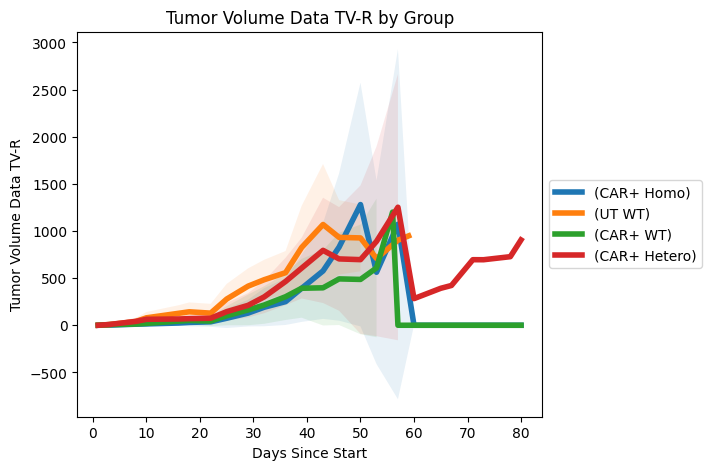

In [6]:
fig, ax = analyzer.plot_data_bygroup('Tumor Volume Data TV-R', figsize=(6,5))

# save figure as svg
fig.savefig('tumor_volume_data_tv-r.svg', format='svg', bbox_inches='tight')


## Separate Plots of Tumor Volumes

Note: Optionally specify a control_group ID to plot behind the other groups.

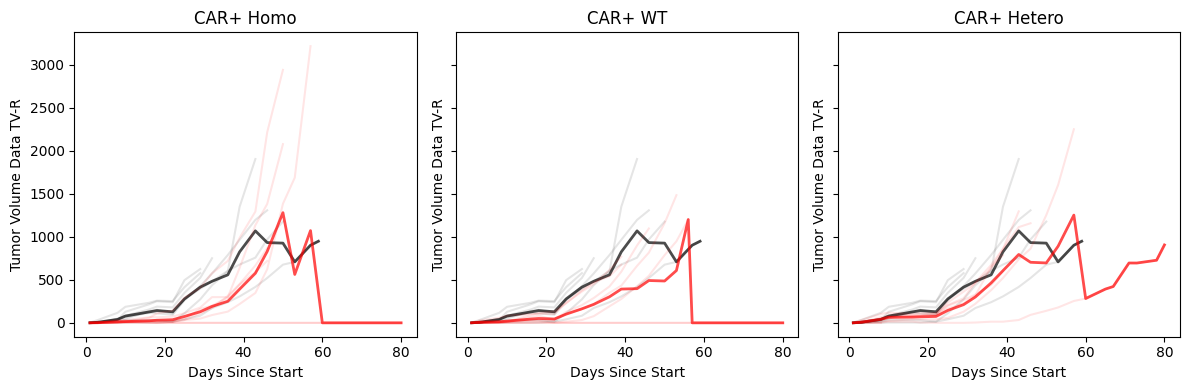

In [7]:
fig, axs = analyzer.subplot_data_bygroup('Tumor Volume Data TV-R', control_group_id="UT WT")

## Separated plots of bodyweight

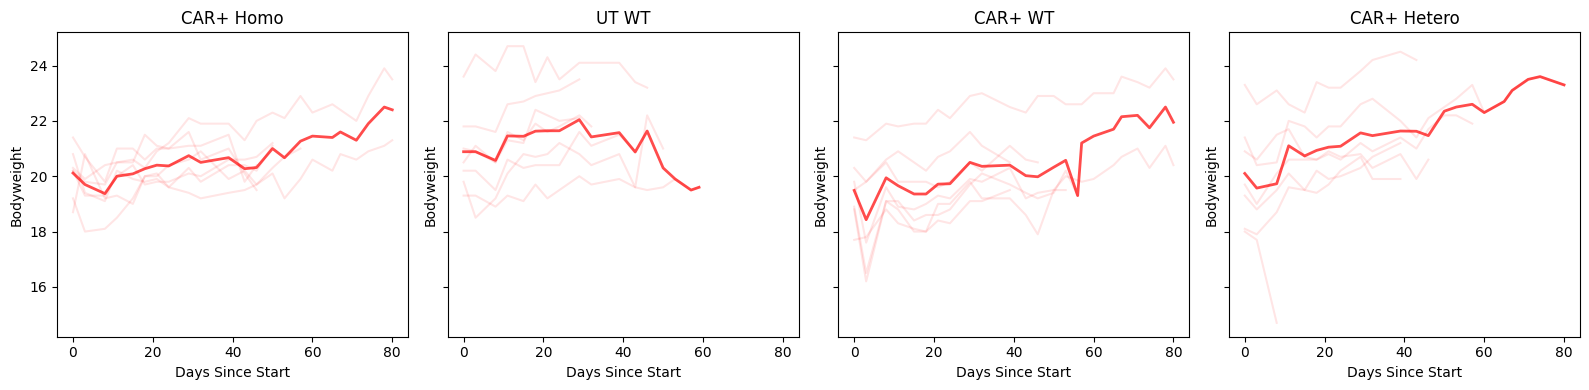

In [8]:
fig, axs = analyzer.subplot_data_bygroup('Bodyweight')